In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

##Decision Tree Classifier from Sk Learn

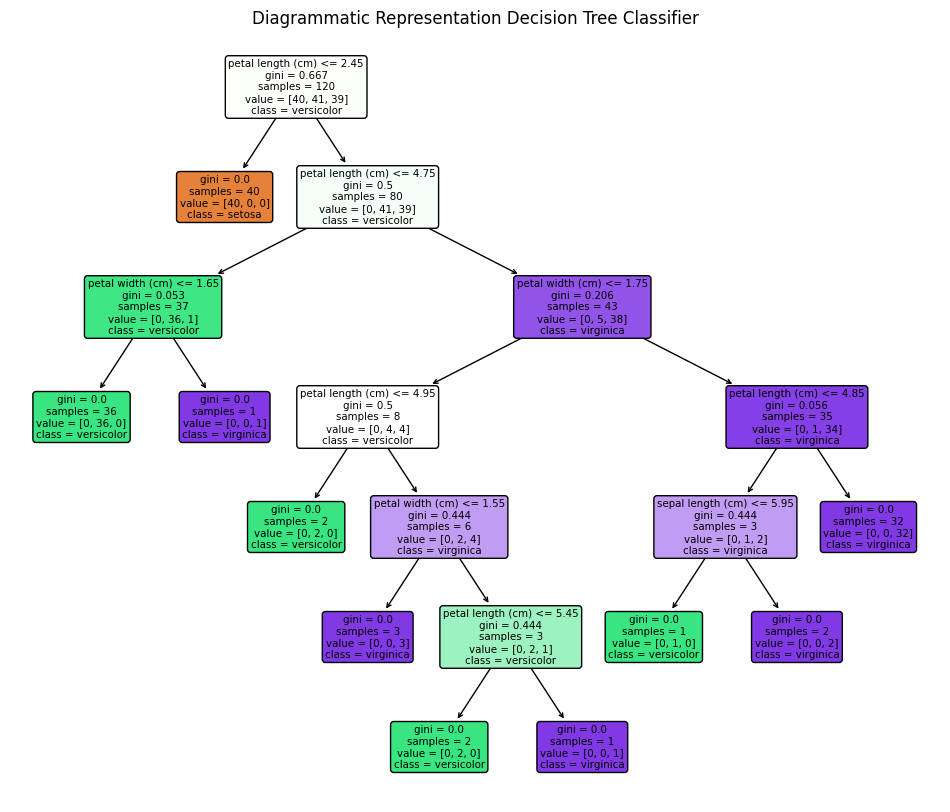

In [23]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the Decision Tree graphically
fig, ax = plt.subplots(figsize=(12, 10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title(label="Diagrammatic Representation Decision Tree Classifier")
plt.show()
#plt.savefig("output.png")

## Decision Tree Classifier From Scratch

In [24]:
class TreeNode:
    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.left = None
        self.right = None
        self.feature_index = None
        self.threshold = None
        self.prediction = None


class DecisionTreeClassifierFromScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes, counts = np.unique(y, return_counts=True)

        node = TreeNode(data=num_samples, target=dict(zip(unique_classes, counts)))

        # Check if the node should be a leaf node
        if len(unique_classes) == 1 or depth == self.max_depth:
            node.prediction = unique_classes[np.argmax(counts)]
            return node

        # Find the best split
        best_feature, best_threshold = self._find_best_split(X, y)

        if best_feature is not None:
            node.feature_index = best_feature
            node.threshold = best_threshold

            # Split the data
            left_mask = X[:, best_feature] <= best_threshold
            right_mask = ~left_mask

            node.left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
            node.right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return node

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape

        if num_samples <= 1:
            return None, None

        # Calculate impurity before the split
        current_impurity = self._calculate_impurity(y)

        best_feature = None
        best_threshold = None
        best_impurity_reduction = 0

        for feature_index in range(num_features):
            thresholds, unique_classes = self._get_thresholds_and_classes(X[:, feature_index], y)

            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) > 0 and np.sum(right_mask) > 0:
                    left_impurity = self._calculate_impurity(y[left_mask])
                    right_impurity = self._calculate_impurity(y[right_mask])

                    impurity_reduction = current_impurity - (len(y[left_mask]) / len(y) * left_impurity +
                                                             len(y[right_mask]) / len(y) * right_impurity)

                    if impurity_reduction > best_impurity_reduction:
                        best_impurity_reduction = impurity_reduction
                        best_feature = feature_index
                        best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_impurity(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        impurity = 1 - np.sum(probabilities ** 2)
        return impurity

    def _get_thresholds_and_classes(self, feature, target):
        unique_values = np.unique(feature)
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2
        unique_classes = np.unique(target)
        return thresholds, unique_classes

    def predict(self, X):
        return np.array([self._predict_single(x, self.root) for x in X])

    def _predict_single(self, x, node):
        if node.prediction is not None:
            return node.prediction

        if x[node.feature_index] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)


Loading the data and fitting the model

In [25]:

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree classifier from scratch
clf_scratch = DecisionTreeClassifierFromScratch(max_depth=3)
# Fit the decision tree to the training data
tree_structure = clf_scratch.fit(X_train, y_train)

# Make predictions on the test set
predictions_scratch = clf_scratch.predict(X_test)

# Evaluate the accuracy
accuracy_scratch = np.mean(predictions_scratch == y_test)
print("Accuracy of the scratch implementation:", accuracy_scratch)


Accuracy of the scratch implementation: 1.0


##Compairing prediction between two classifiers

In [30]:
#Decision Tree Classifier From SKLearn
new_data = [[1.1, 3.5, 1.4, 7.2]]
prediction = clf.predict(new_data)
print("Predicted class:", iris.target_names[prediction[0]])

Predicted class: setosa


In [28]:
#Decision Tree Classifier From Scratch
new_data = [[5.1, 3.5, 1.4, 1.2]]
prediction = clf_scratch.predict(new_data)
print("Predicted class:", iris.target_names[prediction[0]])

Predicted class: setosa
